## Dipole close to a Photonic Crystal Slab

### Study of band-gap emission

In [1]:
import meep as mp 
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

In [2]:
a = 405e-9 # nm
t = 180e-9 / a

c = 3e8

f = 340e12 * a / c                                     # 340 THz(inside band-gap), since a = 405 nm, and c = 3e8: f=freq*a/c

In [3]:
print('Frequency of transition in MEEP units: ',f)

Frequency of transition in MEEP units:  0.459


In [4]:
resolution = 8                                                  # 8 pixels per unit a.

length = 15
lengthz = 5

N = 12

cell = mp.Vector3(length, length, lengthz)                      # 3D case

dpml = 1

pml_layers = [mp.PML(dpml)]

geometry = [mp.Block(center=mp.Vector3(0,0,0), 
            size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
            material=mp.Medium(index = 2))]                    # Block of SiN extending up to PML region 


# A hexagonal prism defined by six vertices centered on the origin
# of material crystalline silicon (from the materials library)

multiplier = (1-t)*0.5

multiplier*1/np.sqrt(3)

vertices = [mp.Vector3(0,multiplier*2/np.sqrt(3)),
            mp.Vector3(multiplier*1,multiplier*1/np.sqrt(3)),
            mp.Vector3(multiplier*1,-multiplier*1/np.sqrt(3)),
            mp.Vector3(0,multiplier*-2/np.sqrt(3)),
            mp.Vector3(-multiplier*1,-multiplier*1/np.sqrt(3)),
            mp.Vector3(-multiplier*1,multiplier*1/np.sqrt(3))]


for i in range(-N+1,N):
    for j in range(-N+1,N):
            geometry.append(mp.Prism(vertices,
                                     height=t,
                                     center=mp.Vector3(i*0.5-j*0.5, i*np.sqrt(3) / 2 + j*np.sqrt(3) / 2),
                                     material=mp.Medium(index = 1))) #add the hexagons in the lattice

                 
src = [mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component=mp.Ez, 
                     amplitude=1.0),
      ]


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00110698 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     prism, center = (0,-19.0526,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0,-18.7318,-0.222222)
          (0.277778,-18.8922,-0.222222)
          (0.277778,-19.2129,-0.222222)
          (0,-19.3733,-0.222222)
          (-0.277778,-19.2129,-0.222222)
          (-0.277778,-18.8922,-0.222222)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-0.5,-18.1865,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (-0.5,-17.8658,-0.222222)
          (-0.222222,-18.0262,-0.222222)
          (-0.222222,-18.3469,-0.222222)
          (-0.5,-18.5073,-0.222222)
      

<AxesSubplot:xlabel='X', ylabel='Z'>

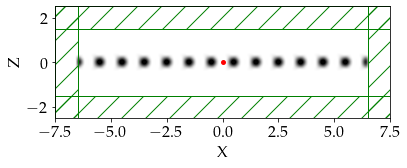

In [5]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(15,0,5)))

<AxesSubplot:xlabel='X', ylabel='Y'>

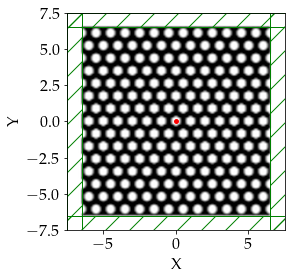

In [6]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(15,15,0)))

<AxesSubplot:xlabel='X', ylabel='Y'>

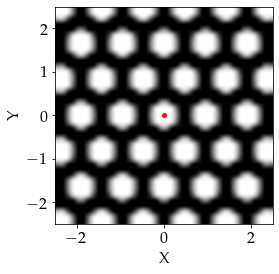

In [7]:
sim.plot2D(output_plane=mp.Volume(center=mp.Vector3(0,0,0),size=mp.Vector3(5,5,0)))

In [8]:
period = 1/390e12
print('Time units in MEEP', a/c* 10**15,'fs')
print('Period for atom frequency: ', period * 10**15,'fs')
num_periods = 3e-14*c/a
print('Number of periods: ', num_periods)
discretization_time = 0.15*a/c 
print('Simulation discretization time:', discretization_time* 10**15,'fs')
print('Fraction of simulation time per period: ', 100*discretization_time/period, '%')

Time units in MEEP 1.35 fs
Period for atom frequency:  2.5641025641025643 fs
Number of periods:  22.222222222222225
Simulation discretization time: 0.20249999999999999 fs
Fraction of simulation time per period:  7.897499999999999 %


In [9]:
sim.run(mp.to_appended("ex", mp.at_every(0.15, mp.output_efield_x)), until=22)

creating output file "./ex.h5"...
Meep progress: 1.0/22.0 = 4.5% done in 4.0s, 84.0s to go
on time step 17 (time=1.0625), 0.236748 s/step
Meep progress: 2.875/22.0 = 13.1% done in 8.2s, 54.6s to go
on time step 46 (time=2.875), 0.144417 s/step
Meep progress: 4.75/22.0 = 21.6% done in 12.4s, 45.1s to go
on time step 76 (time=4.75), 0.140526 s/step
Meep progress: 6.5/22.0 = 29.5% done in 16.5s, 39.4s to go
on time step 104 (time=6.5), 0.145456 s/step
Meep progress: 8.25/22.0 = 37.5% done in 20.6s, 34.3s to go
on time step 132 (time=8.25), 0.145591 s/step
Meep progress: 10.0/22.0 = 45.5% done in 24.6s, 29.6s to go
on time step 160 (time=10), 0.144796 s/step
Meep progress: 11.8125/22.0 = 53.7% done in 28.7s, 24.7s to go
on time step 189 (time=11.8125), 0.138823 s/step
Meep progress: 13.5/22.0 = 61.4% done in 32.7s, 20.6s to go
on time step 216 (time=13.5), 0.150937 s/step
Meep progress: 15.25/22.0 = 69.3% done in 36.9s, 16.3s to go
on time step 244 (time=15.25), 0.148709 s/step
Meep progre

In [10]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

sim.run(mp.to_appended("ey", mp.at_every(0.15, mp.output_efield_y)), until=22)

-----------
Initializing structure...
time for choose_chunkdivision = 0.00118899 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     prism, center = (0,-19.0526,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0,-18.7318,-0.222222)
          (0.277778,-18.8922,-0.222222)
          (0.277778,-19.2129,-0.222222)
          (0,-19.3733,-0.222222)
          (-0.277778,-19.2129,-0.222222)
          (-0.277778,-18.8922,-0.222222)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-0.5,-18.1865,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (-0.5,-17.8658,-0.222222)
          (-0.222222,-18.0262,-0.222222)
          (-0.222222,-18.3469,-0.222222)
          (-0.5,-18.5073,-0.222222)
      

In [11]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution)

sim.run(mp.to_appended("ez", mp.at_every(0.15, mp.output_efield_z)), until=22)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000643969 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     prism, center = (0,-19.0526,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0,-18.7318,-0.222222)
          (0.277778,-18.8922,-0.222222)
          (0.277778,-19.2129,-0.222222)
          (0,-19.3733,-0.222222)
          (-0.277778,-19.2129,-0.222222)
          (-0.277778,-18.8922,-0.222222)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-0.5,-18.1865,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (-0.5,-17.8658,-0.222222)
          (-0.222222,-18.0262,-0.222222)
          (-0.222222,-18.3469,-0.222222)
          (-0.5,-18.5073,-0.222222)
     

In [12]:
import h5py

f = h5py.File('ex.h5', 'r')
efield_x = np.array(f.get('ex')) 
f.close()

In [13]:
f1 = h5py.File('ey.h5', 'r')
efield_y = np.array(f1.get('ey')) 
f1.close()

In [14]:
f2 = h5py.File('ez.h5', 'r')
efield_z = np.array(f2.get('ez')) 
f2.close()

In [15]:
print(np.shape(efield_x))
print(np.shape(efield_y))
print(np.shape(efield_z))

(120, 120, 40, 176)
(120, 120, 40, 176)
(120, 120, 40, 176)


In [16]:
e_x_xy = efield_x [:,:,20,:]
e_y_xy = efield_y [:,:,20,:]
e_z_xy = efield_z [:,:,20,:]

In [17]:
intensity = np.sqrt(e_x_xy**2+e_y_xy**2+e_z_xy**2)

In [18]:
def updatefig(*args):
    global k
    k += 1
    im.set_array(np.array(intensity[:,:,k].T))
    return im,

<IPython.core.display.Javascript object>


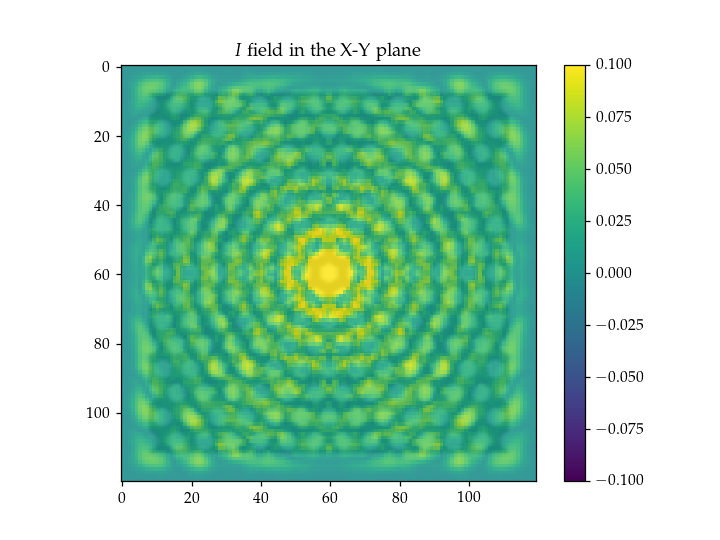

In [20]:
%matplotlib notebook


import matplotlib.animation as animation

fig,ax1 = plt.subplots()

k =  0 
im = ax1.imshow(intensity[:,:,k].T, vmin=-0.1,vmax=0.1, animated=True)

eps = sim.get_epsilon()

diel = ax1.imshow(eps[:,:, 20].T, interpolation='spline36', cmap='binary', alpha =0.1)

ani = animation.FuncAnimation(fig, updatefig, frames=200, interval=60, blit=True, save_count=200)

fig.colorbar(im, ax=ax1)

plt.title('$I$ field in the X-Y plane')
plt.show()

This iss similar to what they find in the PNAS paper!

This is the real part, bu we also want to calculate the imaginary part:

In [4]:
f = 340e12 * a / c                                     # 340 THz(inside band-gap), since a = 405 nm, and c = 3e8: f=freq*a/c

In [5]:
resolution = 8                                                  # 8 pixels per unit a.

length = 15
lengthz = 5

N = 12

cell = mp.Vector3(length, length, lengthz)                      # 3D case

dpml = 1

pml_layers = [mp.PML(dpml)]

geometry = [mp.Block(center=mp.Vector3(0,0,0), 
            size=mp.Vector3(length-2*dpml,length-2*dpml,t), 
            material=mp.Medium(index = 2))]                    # Block of SiN extending up to PML region 


# A hexagonal prism defined by six vertices centered on the origin
# of material crystalline silicon (from the materials library)

multiplier = (1-t)*0.5

multiplier*1/np.sqrt(3)

vertices = [mp.Vector3(0,multiplier*2/np.sqrt(3)),
            mp.Vector3(multiplier*1,multiplier*1/np.sqrt(3)),
            mp.Vector3(multiplier*1,-multiplier*1/np.sqrt(3)),
            mp.Vector3(0,multiplier*-2/np.sqrt(3)),
            mp.Vector3(-multiplier*1,-multiplier*1/np.sqrt(3)),
            mp.Vector3(-multiplier*1,multiplier*1/np.sqrt(3))]


for i in range(-N+1,N):
    for j in range(-N+1,N):
            geometry.append(mp.Prism(vertices,
                                     height=t,
                                     center=mp.Vector3(i*0.5-j*0.5, i*np.sqrt(3) / 2 + j*np.sqrt(3) / 2),
                                     material=mp.Medium(index = 1))) #add the hexagons in the lattice

                 
src = [mp.Source(src=mp.ContinuousSource(f),
                     center=mp.Vector3(x=0, y=0, z=0),
                     component=mp.Ez, 
                     amplitude=1.0),
      ]


sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=src,
                    resolution=resolution,
                    force_complex_fields=True,
                    )

Since our dipole is oriented in the $Z$ direction:

In [6]:
sim.run(mp.to_appended("ez", mp.at_every(0.15, mp.output_efield_z)), until=22)

-----------
Initializing structure...
time for choose_chunkdivision = 0.000542164 s
Working in 3D dimensions.
Computational cell is 15 x 15 x 5 with resolution 8
     block, center = (0,0,0)
          size (13,13,0.444444)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (4,4,4)
     prism, center = (0,-19.0526,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (0,-18.7318,-0.222222)
          (0.277778,-18.8922,-0.222222)
          (0.277778,-19.2129,-0.222222)
          (0,-19.3733,-0.222222)
          (-0.277778,-19.2129,-0.222222)
          (-0.277778,-18.8922,-0.222222)
          dielectric constant epsilon diagonal = (1,1,1)
     prism, center = (-0.5,-18.1865,0)
          height 0.444444, axis (0,0,1), sidewall angle: 0 radians, 6 vertices:
          (-0.5,-17.8658,-0.222222)
          (-0.222222,-18.0262,-0.222222)
          (-0.222222,-18.3469,-0.222222)
          (-0.5,-18.5073,-0.222222)
     

In [7]:
import h5py

f = h5py.File('ez.h5', 'r')
efield_z_r = np.array(f.get('ez.r')) 
efield_z_i = np.array(f.get('ez.i')) 
f.close()

In [8]:
print(np.shape(efield_z_r))

(120, 120, 40, 176)


In [9]:
print(efield_z_i[60,60,20,175])

2.882435631562766


Now that we have calculated the imaginary part of the field in a point, we just need to calculate it for different frequencies and dipole orientations. Also normalize by the contribution of dipole in free space as in Hodd thesisor calculate with simulation without structure. We can write a function for doing this!!